In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import os
from qutip import Qobj
import qutip as qu
from tqdm import tqdm

from src.observables import entropy_vn

D = 20
TIMEDELTA = 0.2

ModuleNotFoundError: No module named 'observables'

In [2]:
def file_dims(filename):
    return int(filename.split('_')[-3][1:])


def file_time(filename):
    return int(filename.split('_')[-2][1:])


def file_timedelta(filename):
    return float(filename.split('_')[-1][2:])


def check_file_metadata(filename):
    dims = file_dims(filename)
    timedelta = file_timedelta(filename)
    return dims == D and timedelta == TIMEDELTA

In [3]:
files = [file.removesuffix('.npz') for file in os.listdir('objects') if file.endswith('.npz')]
times = [file_time(file) for file in files if check_file_metadata(file)]
times.sort()
print(f'Times: {times}')
rho_evolution = []
for t in tqdm(times):
    try:
        rho_evolution_zip = np.load(f'objects/rho_evolution_d{D}_t{t}_dt{TIMEDELTA}.npz')
        rho_evolution_t = [rho_evolution_zip[t] for t in rho_evolution_zip.files]
        rho_evolution.extend(rho_evolution_t)
        print(len(rho_evolution))
    except MemoryError as e:
        print(e)
        break

Times: [10000]


100%|██████████| 1/1 [00:25<00:00, 25.26s/it]

10000


Last Density Matrix

In [4]:
last_rho = Qobj(rho_evolution[-1], dims=[[D, D], [D, D]])
print(last_rho.tr())
last_rho.ptrace(0)

0.9999999999999716


Quantum object: dims = [[20], [20]], shape = (20, 20), type = oper, isherm = True
Qobj data =
[[6.00000004e-01 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 2.40000003e-01 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 9.60000018e-02 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00

100%|██████████| 10000/10000 [11:02<00:00, 15.09it/s]


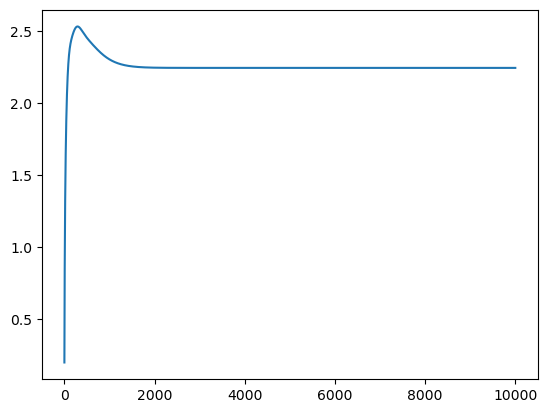

In [5]:
entropies = []
for rho in tqdm(rho_evolution):
    entropies.append(entropy_vn(rho))

plt.plot(entropies)

In [6]:
plt.savefig(f'img/rho_evolution_d{D}_t{t}_dt{TIMEDELTA}.png')

<Figure size 640x480 with 0 Axes>